---
title: RToken Backtester 
description: Backtest RToken yields with Defillama historical data
show-code: False
params:
    token0:
        input: select
        label: Please select a collateral asset
        choices: ['MIM-3CRV (Convex)', 'FRAX-USDC (Convex)', 'ALUSD-3CRV (Convex)', 'DAI (Compound)', 'USDC (Compound)', 'OHM-FRAXBP (Curve)', 'USDC (Aave)', 'USDT (Aave)', 'BUSD (Aave)', 'USDC-USDT (Uniswap V3)', 'BUSD-USDC (Uniswap V3)', 'USDC-USDT (Uniswap V2)', 'OHM-DAI (Balancer)', 'OHM-WETH (Balancer)', 'STETH']
    token1:
        input: select
        label: Please select a collateral asset
        choices: ['MIM-3CRV (Convex)', 'FRAX-USDC (Convex)', 'ALUSD-3CRV (Convex)', 'DAI (Compound)', 'USDC (Compound)', 'OHM-FRAXBP (Curve)', 'USDC (Aave)', 'USDT (Aave)', 'BUSD (Aave)', 'USDC-USDT (Uniswap V3)', 'BUSD-USDC (Uniswap V3)', 'USDC-USDT (Uniswap V2)', 'OHM-DAI (Balancer)', 'OHM-WETH (Balancer)', 'STETH']
---

In [ ]:
import pandas as pd
import numpy as np
import requests as req
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pool_dict = {
    "MIM-3CRV (Convex)": "8a20c472-142c-4442-b724-40f2183c073e",
    "FRAX-USDC (Convex)": "bd072651-d99c-4154-aeae-51f12109c054",
    "ALUSD-3CRV (Convex)": "f11aa021-e4c1-49f9-8004-9cf5625dedae",
    "DAI (Compound)": "cc110152-36c2-4e10-9c12-c5b4eb662143",
    "USDC (Compound)": "7da72d09-56ca-4ec5-a45f-59114353e487",
    "OHM-FRAXBP (Curve)": "652ec67f-20b1-4138-8fc3-d78458f47e1a",
    "USDC (Aave)": "a349fea4-d780-4e16-973e-70ca9b606db2",
    "USDT (Aave)": "60d657c9-5f63-4771-a85b-2cf8d507ec00",
    "BUSD (Aave)": "fd700196-ace0-4adc-8c91-6da04acb4ec3",
    "USDC-USDT (Uniswap V3)": "e737d721-f45c-40f0-9793-9f56261862b9",
    "BUSD-USDC (Uniswap V3)": "4bb8783d-9919-4a8e-980e-546401a67f63",
    "USDC-USDT (Uniswap V2)": "e2c09021-0aa8-42b6-a596-5422c2e35399",
    "OHM-DAI (Balancer)": "645dffc4-fe90-4c8b-9c17-fd8f2143a5fe",
    "OHM-WETH (Balancer)": "ad68c6ce-699a-4c00-986f-5f92e38c1ac1",
    "STETH": "747c1d2a-c668-4682-b9f9-296708a3dd90"
}

In [112]:
# Raw pool data in dictionaries 

pool_dict_raw = dict(pd.DataFrame(req.get('https://yields.llama.fi/pools').json())['data'])

# Dataframe of raw data
df_raw = pd.DataFrame.from_dict(pool_dict_raw, orient='index')
df_raw = df_raw.sort_values(by ='tvlUsd', ascending = False)
eth_pools = df_raw[df_raw.chain == 'Ethereum']

In [ ]:
token0 = "USDC (Compound V3)"
token1 = "USDC (Compound V3)"

In [2]:
# or Create custom basket manually 
# eth_pools[(eth_pools.apyBase > min_apy) & 
#                          (eth_pools.stablecoin == is_stablecoin) & 
#           (eth_pools.tvlUsd > min_tvl)].sort_values(sort_by, ascending=False).head(top_x)[['project','symbol','pool', 'tvlUsd','apy']]


# custom list 

# olympus pool
l = ['bd072651-d99c-4154-aeae-51f12109c054', 'cc110152-36c2-4e10-9c12-c5b4eb662143',
     'e737d721-f45c-40f0-9793-9f56261862b9', '60d657c9-5f63-4771-a85b-2cf8d507ec00',
    'cefa9bb8-c230-459a-a855-3b94e96acd8c', 'f11aa021-e4c1-49f9-8004-9cf5625dedae']


# OHM pools     'ad68c6ce-699a-4c00-986f-5f92e38c1ac1', '645dffc4-fe90-4c8b-9c17-fd8f2143a5fe']

#compound RToken
c = ['3f6aa14f-eb0c-4738-bf74-8bc666f7d2b1', 'bd072651-d99c-4154-aeae-51f12109c054',
     '8a20c472-142c-4442-b724-40f2183c073e', 'cefa9bb8-c230-459a-a855-3b94e96acd8c',
     'cc110152-36c2-4e10-9c12-c5b4eb662143','e737d721-f45c-40f0-9793-9f56261862b9',
     '57647093-2868-4e65-97ab-9cae8ec74e7d', '7da72d09-56ca-4ec5-a45f-59114353e487',
     '60d657c9-5f63-4771-a85b-2cf8d507ec00']

# eUSD Pool 1
e1 = ['cefa9bb8-c230-459a-a855-3b94e96acd8c','e737d721-f45c-40f0-9793-9f56261862b9','a349fea4-d780-4e16-973e-70ca9b606db2',
'60d657c9-5f63-4771-a85b-2cf8d507ec00','57647093-2868-4e65-97ab-9cae8ec74e7d','7da72d09-56ca-4ec5-a45f-59114353e487',
'e2c09021-0aa8-42b6-a596-5422c2e35399','4bb8783d-9919-4a8e-980e-546401a67f63', 'fd700196-ace0-4adc-8c91-6da04acb4ec3']

# eUSD Pool 2
e2 = ['7da72d09-56ca-4ec5-a45f-59114353e487','60d657c9-5f63-4771-a85b-2cf8d507ec00','fd700196-ace0-4adc-8c91-6da04acb4ec3']

bespoke = ["7da72d09-56ca-4ec5-a45f-59114353e487", pool_dict[token0], pool_dict[token1] ]
pool_symbols = eth_pools[eth_pools.pool.isin(bespoke)][['project','symbol','pool', 'tvlUsd','apy']]


NameError: name 'eth_pools' is not defined

## RToken Basket Composition

In [4]:
# Set Parameters for Basket

min_apy = 0
is_stablecoin = True
min_tvl = 80000000
top_x = 15
sort_by = 'apy' # or tvlUsd or apy


In [118]:
# Creates a table with pool symbol and pool ids to be later used for joining 

# pool_symbols = eth_pools[(eth_pools.apyBase > min_apy) & 
#                          (eth_pools.stablecoin == is_stablecoin) & 
#           (eth_pools.tvlUsd > min_tvl)].sort_values(sort_by, ascending=False).head(top_x)[['project','symbol','pool', 'tvlUsd','apy']]

# calc for income
pool_symbols['income'] = pool_symbols.tvlUsd * pool_symbols.apy

# calc for income weighted basket based on current TVL and APY 
pool_symbols['income_basket_weight'] = round(pool_symbols.income / sum(pool_symbols.income),2)

# concat the pool symbol to show pool and protocol
pool_symbols['pool (protocol)'] = pool_symbols.symbol + " (" + pool_symbols.project + ")"

#drop columns that we no longer need
pool_symbols= pool_symbols.drop(['tvlUsd','apy','income'], axis=1)




In [120]:
# Insert custom basket weights
custom_weights1 = [.12,.14,.11,.11,.11,.13,.10,.09,.09]

custom_weights2 = .33
pool_symbols.income_basket_weight = custom_weights2

In [121]:
basket_pool_ids = list(pool_symbols.pool)

In [122]:
pool_symbols

,project,symbol,pool,income_basket_weight,pool (protocol)
107,aave-v2,USDT,60d657c9-5f63-4771-a85b-2cf8d507ec00,0.33,USDT (aave-v2)
173,compound-v3,USDC,7da72d09-56ca-4ec5-a45f-59114353e487,0.33,USDC (compound-v3)
666,aave-v2,BUSD,fd700196-ace0-4adc-8c91-6da04acb4ec3,0.33,BUSD (aave-v2)


In [123]:
# Establishes a list of dataframes of historical data for each of the pools in the desired basket

pool_dfs = []
for i in basket_pool_ids:
    data = pd.DataFrame()
    data = pd.DataFrame(req.get('https://yields.llama.fi/chart/'+ str(i)).json()['data'])
    data = data[['timestamp','tvlUsd','apy']]
    data['timestamp'] = [i[0:10] for i in list(data.timestamp)]
    data['timestamp'] = pd.to_datetime(data.timestamp)
    data['pool_id'] = str(i)
    
    # joins pool symbol onto dataframe using pool id
    data = pd.merge(data, pool_symbols, how='left', 
         left_on= 'pool_id', right_on='pool' )[['timestamp','tvlUsd','apy','income_basket_weight','pool (protocol)']]
    
    # adds column for portfolio yield contribution (apy * income_basket_weight)
    data['portfolio_yield_contribution'] = data.iloc[:,2] * data.iloc[:,3]
    
    # renames columns to reflect pool symbol and drops pool symbol column
    pool_protocol_string = data['pool (protocol)'][0]
    data.columns = ['timestamp',  
                      ('tvlUsd | ' + pool_protocol_string), 
                       ('apy | ' + pool_protocol_string),
                    'income_basket_weight | ' + pool_protocol_string,
                    'pool (protocol)',
                   'portfolio_yield_contribution | ' + pool_protocol_string]
    data = data.drop('pool (protocol)', axis=1)
    
    # creates and calculates column for income (apy column has more decimal points than shown, results in slight math discrepency on income)
    #income_column_string = 'income | ' + pool_protocol_string
    #data[income_column_string] = data.iloc[:, 1] * data.iloc[:, 2] / 100
    
    pool_dfs.append(data)

In [126]:
# Creating master dataframe with historical data froma all pools, using the pool that has the least hisory as base

from functools import reduce
df = reduce(lambda x, y: pd.merge(x, y, on = 'timestamp', how ='left'), sorted(pool_dfs, key=len))

In [129]:
tvl_cols = [col for col in df.columns if 'tvlUsd |' in col]
apy_cols = [col for col in df.columns if 'apy |' in col]
income_basket_cols = [col for col in df.columns if 'income_basket_weight |' in col]
yield_contribution_cols = [col for col in df.columns if 'portfolio_yield_contribution |' in col]

# total_income column is all the annualized incomes added together on a specific date
df['total_portfolio_yield'] = df[yield_contribution_cols].sum(axis=1)

## Backtest Results

(array([738429., 738443., 738460., 738474., 738490., 738504., 738521.,
        738535., 738552.]), <a list of 9 Text major ticklabel objects>)

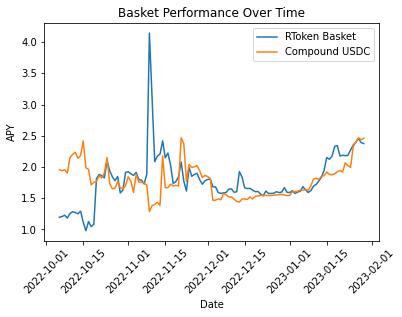

In [131]:
sns.lineplot(x = "timestamp", y = "total_portfolio_yield",
             data = df[df.total_portfolio_yield <10])
sns.lineplot(x = "timestamp", y = "apy | USDC (compound-v3)",
              data = df)
plt.title('Basket Performance Over Time')
plt.ylabel('APY')
plt.xlabel('Date')
plt.legend(['RToken Basket','Compound USDC'])
plt.xticks(rotation = 45)
plt.figure(figsize=(20,10))
print('')